# MNIST dataset exploration -Problem 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from functools import partial
import math

Declaration of the packages

# 1 (a)

In [2]:
from keras.datasets import mnist
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

Using TensorFlow backend.


Instead of downloading the dataset, it was imported from the package Keras.

In [3]:
Xtrain=Xtrain.reshape(60000,784).astype(int)
ytrain=ytrain.astype(int)
Xtest=Xtest.reshape(10000,784).astype(int)
ytest=ytest.astype(int)

The training dataset has the dimensions of (60000,28,28) which was flattened to (60000,784). Similar operation was also performed on the  test set. 

# 1(b)

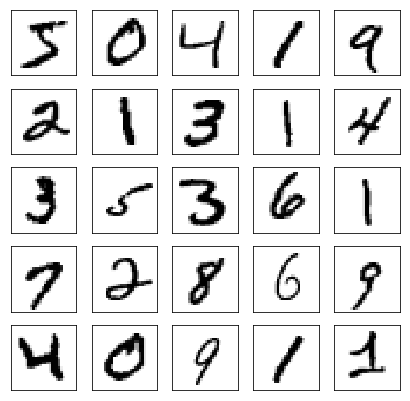

In [8]:
fig, ax = plt.subplots(5, 5, figsize=(7, 7))
for i, axi in enumerate(ax.flat):
    axi.imshow(np.array(Xtrain[i]).reshape(28,28), cmap='binary')
    axi.set(xticks=[], yticks=[])

1(b).i The first 25 images were plotted. Since MNIST is a dataset consisting of Handwritten digits we see that there is a lot of difference between each instance of a number.

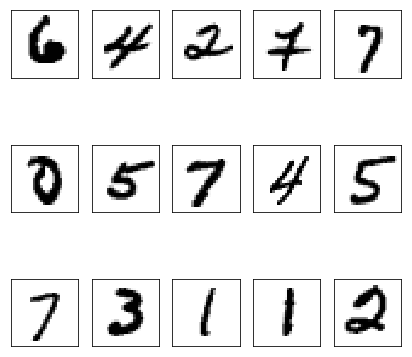

In [12]:
indices = np.random.choice(Xtest.shape[0], 15, replace=False)
data1=np.array(Xtest[indices])
fig, ax = plt.subplots(3, 5, figsize=(7, 7))
for i, axi in enumerate(ax.flat):
    axi.imshow(data1[i].reshape(28,28), cmap='binary')
    axi.set(xticks=[], yticks=[])

1(b).ii The first 15 images of the test set were plotted.My guesses for the digits were(in row wise order) :6,4,2,7,7,0,5,7,4, 5,7,3,1,1,2.

In [13]:
print('The actual label on the images was {0}'.format(list(ytest[indices])))

The actual label on the images was [[6, 4, 2, 7, 7, 0, 5, 7, 4, 5, 7, 3, 1, 1, 2]


All my guesses were right as the digits were easily discernible.

1(b).iii Few images were such that it was difficult to classify them into a particular group. This was because they were handwritten digits

# 1(c)

In [14]:
mod1=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric="euclidean")
mod1.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
ind=mod1.kneighbors(Xtrain[0].reshape(1,784),return_distance=False,n_neighbors=1)
print('1(c) .i The nearest neighbours of the train sample at index= {0} which is included in the training set is {1}'.format(0,ind[0]))

1(c) .i The nearest neighbours of the train sample at index= 0 which is included in the training set is [0]


1(c).i As we can see above the nearest sample is the sample itself.

1(c) .ii The nearest neighbors of the test samples are plotted below.

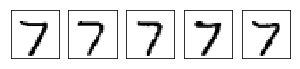

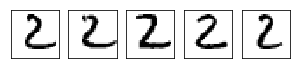

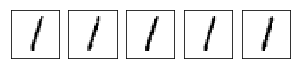

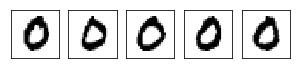

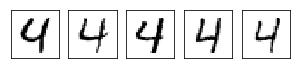

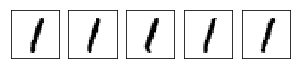

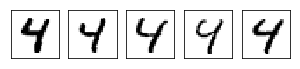

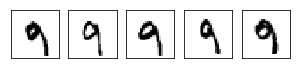

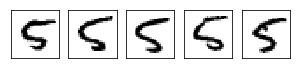

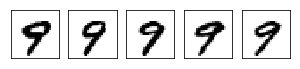

In [9]:
for j in range(0,10):
    indices=mod1.kneighbors(Xtest[j].reshape(1,784),n_neighbors=5,return_distance=False)
    data2=np.array(Xtrain[indices])
    data2=data2.reshape(5,784)
    fig, ax = plt.subplots(1, 5, figsize=(5, 5))
    for i, axi in enumerate(ax.flat):
        axi.imshow(data2[i].reshape(28,28), cmap='binary')
        axi.set(xticks=[], yticks=[])

1(c).iii Since I did not have adequate computational resources I have only taken 3000 training samples for training and 1000 test samples.The k-nearest neighbors also decreased respectively.

In [58]:
x=np.arange(1,221,20)
train_error1=[]
test_error1=[]

In [59]:
for i in range(0,11): 
    mod1=KNeighborsClassifier(n_neighbors=x[i],weights='uniform',metric="euclidean")
    mod1.fit(np.array(Xtrain[0:6000]),np.array(ytrain[0:6000]))
    train_error1.insert(i,mod1.score(np.array(Xtrain[0:2000]),np.array(ytrain[0:2000])))
    test_error1.insert(i,mod1.score(np.array(Xtest[0:1000]),np.array(ytest[0:1000])))

(-0.044776119402985079, 1.0497512437810945, -0.01095, 0.22994999999999996)

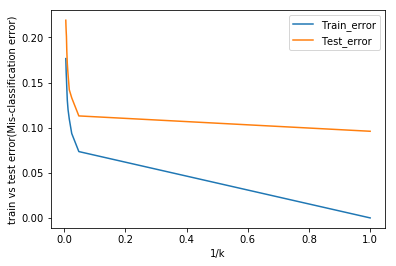

In [60]:
x1=np.array(train_error1[::-1])
y1=np.array(test_error1[::-1])
x1=1-x1
y1=1-y1
df=np.array(sorted(np.arange(1,221,20),reverse=True))
df=1/df
plt.plot(df,x1,label='Train_error')
plt.plot(df,y1,label='Test_error')
plt.xlabel('1/k')
plt.ylabel('train vs test error(Mis-classification error)')
plt.legend()
plt.axis('tight')

1(c).iii The best k-value is obviously 1 (atleast for the training set) because it is contained in the training set while predicting.For testing set it is usually close to 1 because the lesser the number of samples the lesser is the distance of test image to model built, the more likely it will match the label on the train sample.

(1300.0, 16700.0, 0.025475000000000025, 0.059024999999999994)

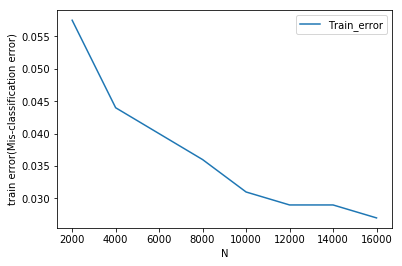

In [61]:
train_error=[]
dab=np.arange(2000,18000,2000)
for i in range(0,8):
    mod1=KNeighborsClassifier(n_neighbors=4,weights='uniform',metric="euclidean")
    mod1.fit(np.array(Xtrain[0:dab[i]]),np.array(ytrain[0:dab[i]]))
    train_error.insert(i,mod1.score(np.array(Xtrain[0:2000]),np.array(ytrain[0:2000])))
x1=np.array(train_error)
x1=1-x1
df=np.array(sorted(np.arange(2000,18000,2000)))
plt.plot(df,x1,label='Train_error')
plt.xlabel('N')
plt.ylabel('train error(Mis-classification error)')
plt.legend()
plt.axis('tight')    

As we can see in the graph above the error rate goes down as the Training set size(N) is increased.


#

# 1(d)

Below I have plotted some of k-nearest of the misclassified samples. As observed from the images, it is usually data which is highly unclear due to the handwriting as the digit discernation becomes difficult. For example the first classified example had 9,0,5 as its neighbors. The digit was close in the distance metric to all these digits because it was unclearly written.

In [62]:
ypred3=mod1.predict(Xtrain[0:2000])


C:\Users\Abhi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


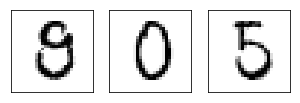

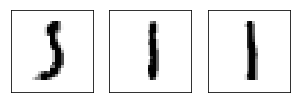

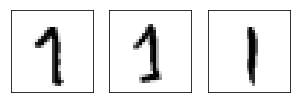

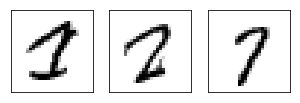

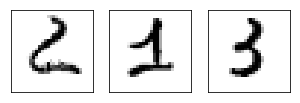

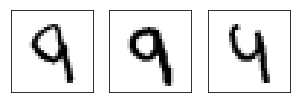

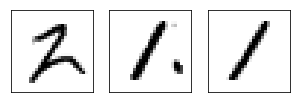

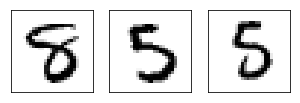

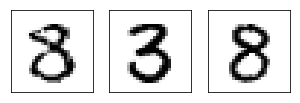

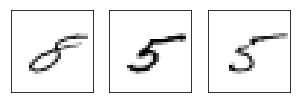

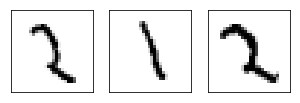

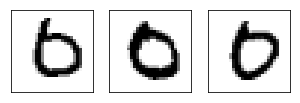

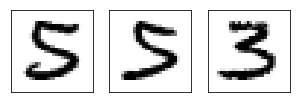

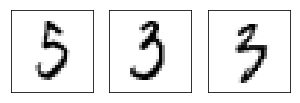

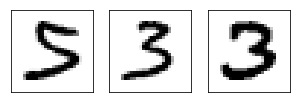

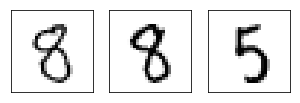

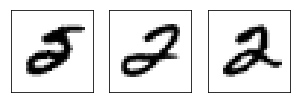

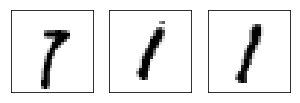

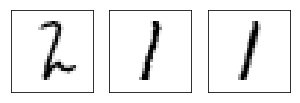

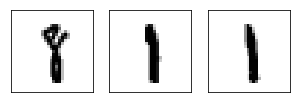

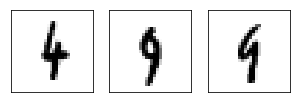

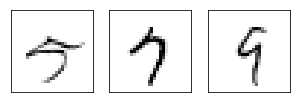

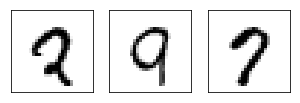

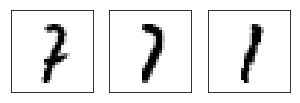

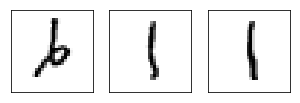

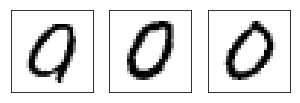

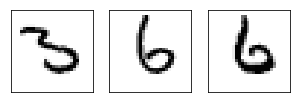

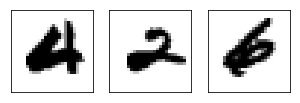

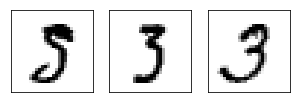

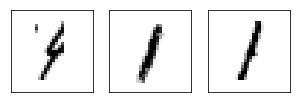

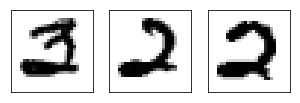

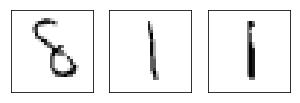

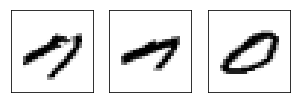

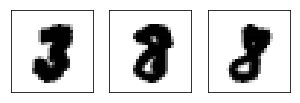

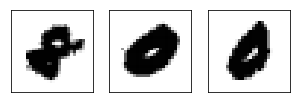

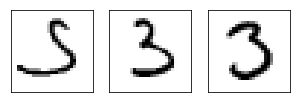

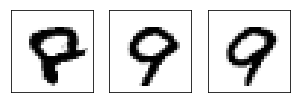

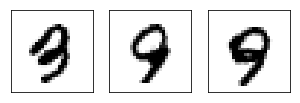

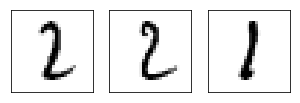

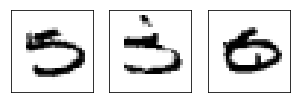

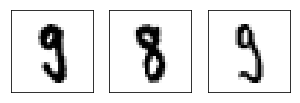

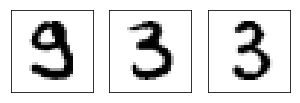

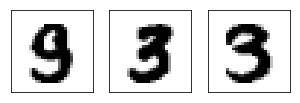

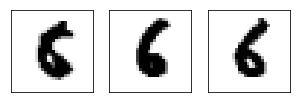

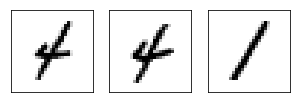

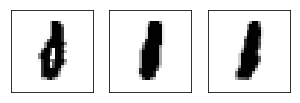

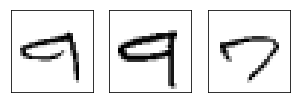

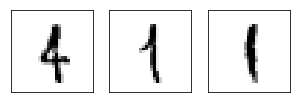

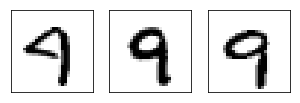

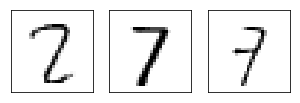

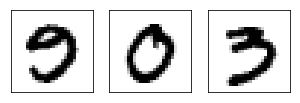

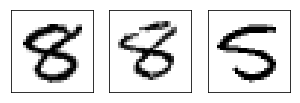

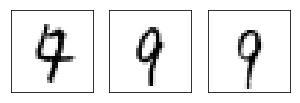

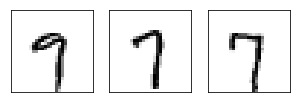

In [64]:
for i in range(0,2000):
    if(ypred3[i]!=ytrain[i]):
        ind=mod1.kneighbors(Xtrain[i].reshape(1,784),n_neighbors=3,return_distance=False)
        data2=np.array(Xtrain[ind])
        data2=data2.reshape(3,784)
        plt.
        fig, ax = plt.subplots(1, 4, figsize=(5, 5))
        for i, axi in enumerate(ax.flat):
            axi.imshow(data2[i].reshape(28,28), cmap='binary')
            axi.set(xticks=[], yticks=[])
    

# 1(e)

In [4]:
test_error2=[]
mod1=KNeighborsClassifier(n_neighbors=4,weights='uniform',metric="minkowski",p=1)
mod1.fit(np.array(Xtrain[0:3000]),np.array(ytrain[0:3000]))                                  #manhattan distance 
test_error2.insert(0,mod1.score(np.array(Xtest[0:1000]),np.array(ytest[0:1000])))

In [5]:
d=np.arange(0.1,1.1,0.1)                                  #minkowski distance with log10(p=0.1-1)
for i in range(1,11):
    mod1=KNeighborsClassifier(n_neighbors=4,weights='uniform',metric="minkowski",p=math.pow(10,i/10))
    mod1.fit(np.array(Xtrain[0:3000]),np.array(ytrain[0:3000]))                                  
    test_error2.insert(i,mod1.score(np.array(Xtest[0:1000]),np.array(ytest[0:1000])))
    

In [6]:
mod1=KNeighborsClassifier(n_neighbors=4,weights='uniform',metric="chebyshev")
mod1.fit(np.array(Xtrain[0:3000]),np.array(ytrain[0:3000]))                                  #chebyshev distance 
test_error2.insert(12,mod1.score(np.array(Xtest[0:1000]),np.array(ytest[0:1000])))

In [ ]:
m1 = KNeighborsClassifier(algorithm='auto',weights='uniform',metric_params={'VI':np.linalg.pinv(np.cov(np.array(Xtrain[:3000])))},n_neighbors=4,metric='mahalanobis')
m1.fit(np.array(Xtrain[:3000]), np.array(ytrain[:3000]))
test_error2.insert(13,m1.score(np.array(Xtest[0:1000]),np.array(ytest[0:1000])))

In [14]:
test_label=['Manhattan','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1','Chebyshev']

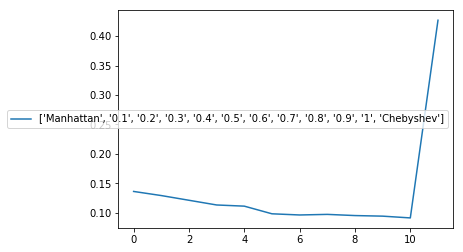

In [25]:
c1=np.array(test_error2)
c1=1-c1
plt.plot(c1,label=test_label)
plt.legend()


# 1 (f)

In [26]:
test_error3=[]
mod1=KNeighborsClassifier(n_neighbors=4,weights='distance',metric="minkowski",p=1)
mod1.fit(np.array(Xtrain[0:3000]),np.array(ytrain[0:3000]))                                  #manhattan distance 
test_error3.insert(0,mod1.score(np.array(Xtest[0:1000]),np.array(ytest[0:1000])))

In [27]:
d=np.arange(0.1,1.1,0.1)                                  #minkowski distance with log10(p=0.1-1)
for i in range(1,11):
    mod1=KNeighborsClassifier(n_neighbors=4,weights='distance',metric="minkowski",p=math.pow(10,i/10))
    mod1.fit(np.array(Xtrain[0:3000]),np.array(ytrain[0:3000]))                                  
    test_error3.insert(i,mod1.score(np.array(Xtest[0:1000]),np.array(ytest[0:1000])))

In [28]:
mod1=KNeighborsClassifier(n_neighbors=4,weights='distance',metric="chebyshev")
mod1.fit(np.array(Xtrain[0:3000]),np.array(ytrain[0:3000]))                                  #chebyshev distance 
test_error3.insert(12,mod1.score(np.array(Xtest[0:1000]),np.array(ytest[0:1000])))

In [ ]:
m1 = KNeighborsClassifier(algorithm='auto',weights='distance',metric_params={'VI':np.linalg.pinv(np.cov(np.array(Xtrain[:3000])))},n_neighbors=4,metric='mahalanobis')
m1.fit(np.array(Xtrain[:3000]), np.array(ytrain[:3000]))                              #Mahalanobis distance
test_error3.insert(13,m1.score(np.array(Xtest[0:1000]),np.array(ytest[0:1000])))

In [30]:
test_label=['Manhattan','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1','Chebyshev']

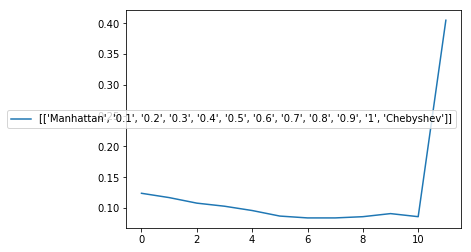

In [31]:
c1=np.array(test_error3)
c1=1-c1
plt.plot(c1,label=[test_label])
plt.legend()


# 1(g)

-I found the more the examples used the better the model. When the 'p'  paramter in Minkowski distance the results were better till a certain value of 'p' was reached beyond which the values steadily decreased.

-**The best model** was using Euclidean distance and had 18000 examples. If more examples had been used then maybe other models would have performed better.

-Also, using higher values of number of neighbors always did not lead to lesser error values. It was best to use small odd values such as 7,9,11 to break ties if any and keep computation to a minimum. 

# The end